data : https://www.kaggle.com/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store?select=2019-Nov.csv

In [52]:
import pandas as pd
from IPython.display import display
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

import gc

# del df
gc.collect()  # 메모리 해제

df = pd.read_csv("c:\\data\\e-commerce\\2019-Oct.csv", usecols=['event_time', 'event_type', 'product_id', 'brand', 'category_code', 'price', 'user_id', 'user_session'])
df.head(2)

,event_time,event_type,product_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc


In [53]:
print(df['user_id'].nunique())

3022290


In [54]:
df[df['user_id'] == 541312140].head(2)

,event_time,event_type,product_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
13,2019-10-01 00:00:15 UTC,view,44600062,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c


In [55]:
def find_longest_session(df, user_id):
    df = df[df['user_id'] == user_id]
    most_frequent_session = df['user_session'].mode()[0]
    longest = df[df['user_session'] == most_frequent_session]
    return longest

In [56]:
longest = find_longest_session(df, 541312140)
display(longest)

,event_time,event_type,product_id,category_code,brand,price,user_id,user_session
5811020,2019-10-05 14:11:38 UTC,view,17700020,NaN,payot,83.58,541312140,23fb14a1-9fd3-4e35-a729-bfaa64f4e875
5812058,2019-10-05 14:12:25 UTC,view,17600166,NaN,payot,36.98,541312140,23fb14a1-9fd3-4e35-a729-bfaa64f4e875
5812515,2019-10-05 14:12:47 UTC,view,21900014,NaN,payot,23.19,541312140,23fb14a1-9fd3-4e35-a729-bfaa64f4e875
5812957,2019-10-05 14:13:06 UTC,view,21900014,NaN,payot,23.19,541312140,23fb14a1-9fd3-4e35-a729-bfaa64f4e875
5813444,2019-10-05 14:13:28 UTC,view,17600060,NaN,payot,112.02,541312140,23fb14a1-9fd3-4e35-a729-bfaa64f4e875
...,...,...,...,...,...,...,...,...
5888045,2019-10-05 15:09:27 UTC,view,17600057,NaN,payot,43.98,541312140,23fb14a1-9fd3-4e35-a729-bfaa64f4e875
5888536,2019-10-05 15:09:50 UTC,view,17600058,NaN,payot,49.89,541312140,23fb14a1-9fd3-4e35-a729-bfaa64f4e875
5893734,2019-10-05 15:13:33 UTC,view,17600900,NaN,vichy,22.39,541312140,23fb14a1-9fd3-4e35-a729-bfaa64f4e875
5901636,2019-10-05 15:19:06 UTC,view,17600843,NaN,vichy,32.82,541312140,23fb14a1-9fd3-4e35-a729-bfaa64f4e875


In [57]:
longest = find_longest_session(df, 554748717)
display(longest)

,event_time,event_type,product_id,category_code,brand,price,user_id,user_session
27,2019-10-01 00:00:25 UTC,view,3900990,appliances.environment.water_heater,ariston,122.18,554748717,5459fbe4-2aa5-42b9-9064-05f853218fe0
96,2019-10-01 00:01:25 UTC,view,3900990,appliances.environment.water_heater,ariston,122.18,554748717,5459fbe4-2aa5-42b9-9064-05f853218fe0


In [58]:
behavior_count = df.groupby('user_id')['user_session'].nunique().sort_values(ascending=True)
behavior_count

user_id
566280416       1
566280399       1
566280392       1
566280379       1
566280378       1
             ... 
561163588    1182
563459593    1618
514649263    2336
526731152    2773
512475445    7400
Name: user_session, Length: 3022290, dtype: int64

In [59]:
longest = find_longest_session(df, behavior_count.idxmax())
longest

,event_time,event_type,product_id,category_code,brand,price,user_id,user_session
30435143,2019-10-22 17:39:44 UTC,view,6000287,auto.accessories.alarm,centurion,95.24,512475445,0173194a-a128-469e-b7f7-418de22cd456
30435816,2019-10-22 17:40:14 UTC,view,6000287,auto.accessories.alarm,centurion,95.24,512475445,0173194a-a128-469e-b7f7-418de22cd456
30436144,2019-10-22 17:40:27 UTC,view,6000287,auto.accessories.alarm,centurion,95.24,512475445,0173194a-a128-469e-b7f7-418de22cd456


In [60]:
count = (behavior_count == 1).sum()
print(count)

1475463


In [61]:
list1 = behavior_count[behavior_count == 1].index.tolist()
list1[:3]

[566280416, 566280399, 566280392]

In [62]:
longest = find_longest_session(df, list1[1])
longest

,event_time,event_type,product_id,category_code,brand,price,user_id,user_session
42448353,2019-10-31 23:56:46 UTC,view,4802888,electronics.audio.headphone,apple,30.84,566280399,63dd0460-2ee7-4df3-a0b0-17d78f3029a2
42448365,2019-10-31 23:56:55 UTC,view,4803399,electronics.audio.headphone,jbl,33.21,566280399,63dd0460-2ee7-4df3-a0b0-17d78f3029a2
42448386,2019-10-31 23:57:10 UTC,view,4803186,electronics.audio.headphone,harper,25.71,566280399,63dd0460-2ee7-4df3-a0b0-17d78f3029a2
42448578,2019-10-31 23:58:40 UTC,view,4804110,electronics.audio.headphone,sony,900.90,566280399,63dd0460-2ee7-4df3-a0b0-17d78f3029a2
42448619,2019-10-31 23:58:57 UTC,view,4804110,electronics.audio.headphone,sony,900.90,566280399,63dd0460-2ee7-4df3-a0b0-17d78f3029a2
42448695,2019-10-31 23:59:29 UTC,view,4804695,electronics.audio.headphone,fender,279.29,566280399,63dd0460-2ee7-4df3-a0b0-17d78f3029a2


In [63]:
purchase = df[df['event_type'] == 'purchase']
purchase.head(2)

,event_time,event_type,product_id,category_code,brand,price,user_id,user_session
162,2019-10-01 00:02:14 UTC,purchase,1004856,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
308,2019-10-01 00:04:37 UTC,purchase,1002532,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68


In [64]:
cart = df[df['event_type'] == 'cart']
cart.head(2)

,event_time,event_type,product_id,category_code,brand,price,user_id,user_session
331,2019-10-01 00:05:14 UTC,cart,5100816,NaN,xiaomi,29.51,550121407,6f623695-9581-4633-813f-825b8760c7ae
583,2019-10-01 00:09:33 UTC,cart,1002524,electronics.smartphone,apple,515.67,524325294,0b74a829-f9d7-4654-b5b0-35bc9822c238


In [65]:
def get_weekday(df):
    df['event_time'] = pd.to_datetime(df['event_time'])
    df['weekday'] = df['event_time'].dt.strftime('%A')
    return df['weekday']

df['weekday'] = get_weekday(df)
df

,event_time,event_type,product_id,category_code,brand,price,user_id,user_session,weekday
0,2019-10-01 00:00:00+00:00,view,44600062,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,Tuesday
1,2019-10-01 00:00:00+00:00,view,3900821,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,Tuesday
2,2019-10-01 00:00:01+00:00,view,17200506,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,Tuesday
3,2019-10-01 00:00:01+00:00,view,1307067,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,Tuesday
4,2019-10-01 00:00:04+00:00,view,1004237,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,Tuesday
...,...,...,...,...,...,...,...,...,...
42448759,2019-10-31 23:59:58+00:00,view,2300275,electronics.camera.video,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193,Thursday
42448760,2019-10-31 23:59:58+00:00,view,10800172,NaN,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8,Thursday
42448761,2019-10-31 23:59:58+00:00,view,5701038,auto.accessories.player,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd,Thursday
42448762,2019-10-31 23:59:59+00:00,view,21407424,electronics.clocks,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204,Thursday


In [66]:
view_count_by_weekday = df[df['event_type'] == 'view']['weekday'].value_counts()
view_count_by_weekday

weekday
Tuesday      6548319
Wednesday    6398991
Thursday     6135484
Sunday       5623993
Friday       5584378
Saturday     5380190
Monday       5108044
Name: count, dtype: int64

In [67]:
weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
view_count_by_weekday = view_count_by_weekday.reindex(weekday_order)
view_count_by_weekday

weekday
Sunday       5623993
Monday       5108044
Tuesday      6548319
Wednesday    6398991
Thursday     6135484
Friday       5584378
Saturday     5380190
Name: count, dtype: int64

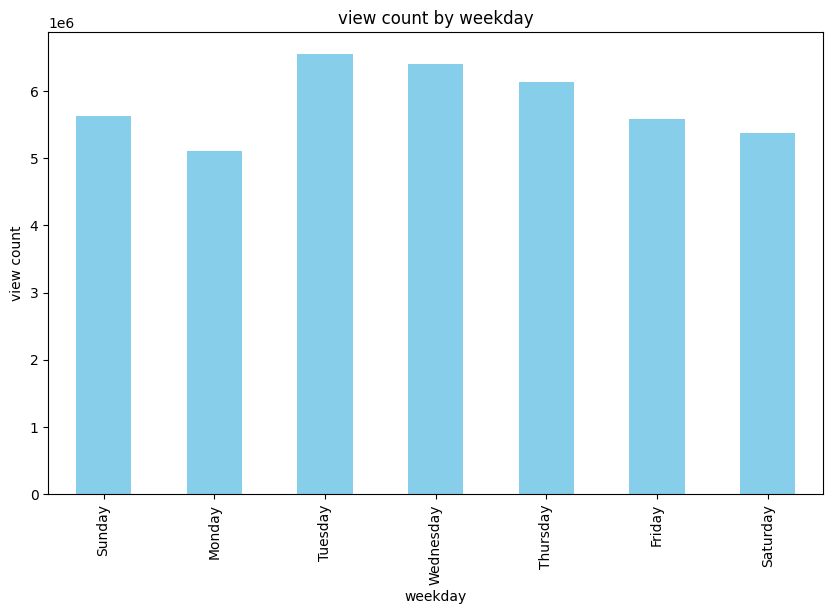

In [68]:
plt.figure(figsize=(10, 6))

view_count_by_weekday.plot(kind='bar', color='skyblue')
plt.title('view count by weekday')
plt.xlabel('weekday')
plt.ylabel('view count')
plt.show()

In [69]:
purchase_count_by_weekday = df[df['event_type'] == 'purchase']['weekday'].value_counts()
purchase_count_by_weekday

weekday
Wednesday    119159
Tuesday      114510
Thursday     113664
Friday       103044
Sunday       100233
Saturday      96177
Monday        96062
Name: count, dtype: int64

In [70]:
weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

purchase_count_by_weekday = purchase_count_by_weekday.reindex(weekday_order)
purchase_count_by_weekday

weekday
Sunday       100233
Monday        96062
Tuesday      114510
Wednesday    119159
Thursday     113664
Friday       103044
Saturday      96177
Name: count, dtype: int64

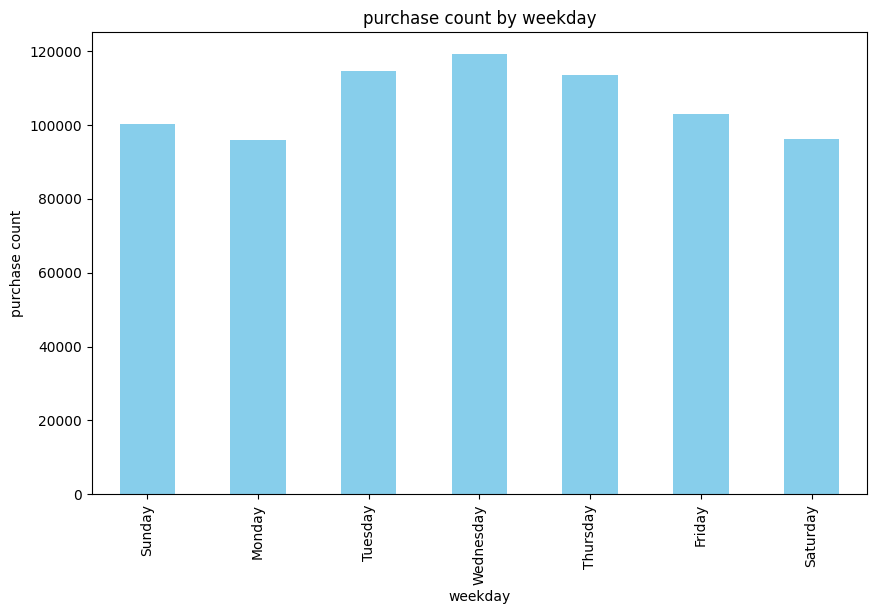

In [71]:
plt.figure(figsize=(10, 6))

purchase_count_by_weekday.plot(kind='bar', color='skyblue')
plt.title('purchase count by weekday')
plt.xlabel('weekday')
plt.ylabel('purchase count')
plt.show()

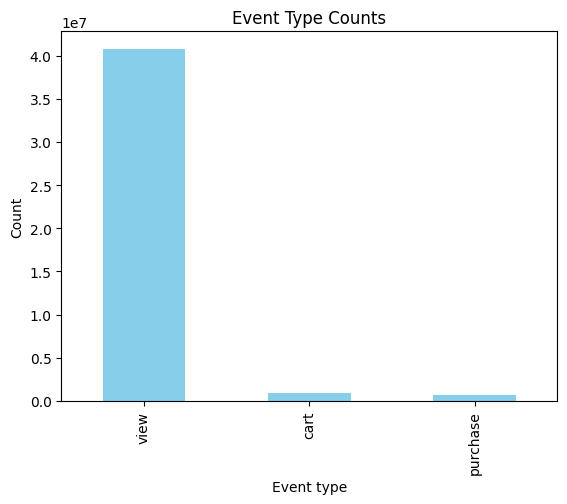

In [72]:
event_type_count = df['event_type'].value_counts()

event_type_count.plot(kind='bar', color='skyblue')
plt.xlabel('Event type')
plt.ylabel('Count')
plt.title('Event Type Counts')
plt.show()

In [73]:
event_type_count.drop('view', inplace=True)
event_type_count

event_type
cart        926516
purchase    742849
Name: count, dtype: int64

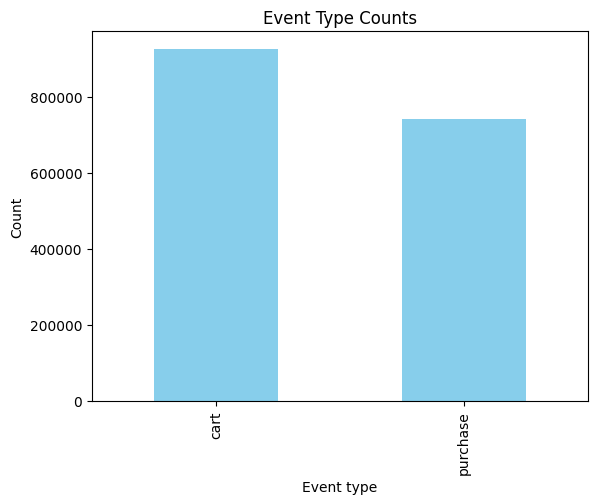

In [74]:
event_type_count.plot(kind='bar', color='skyblue')
plt.xlabel('Event type')
plt.ylabel('Count')
plt.title('Event Type Counts')
plt.show()

In [75]:
df.head(2)

,event_time,event_type,product_id,category_code,brand,price,user_id,user_session,weekday
0,2019-10-01 00:00:00+00:00,view,44600062,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,Tuesday
1,2019-10-01 00:00:00+00:00,view,3900821,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,Tuesday


In [76]:
df['category_code'] = df['category_code'].astype('category')
df['category_code'] = df['category_code'].cat.add_categories('unknown.')
df['category_code'].fillna('unknown.', inplace=True)

df['general_category'] = df['category_code'].apply(lambda x: x.split('.')[0])
display(df.head(2))

C:\Users\User\AppData\Local\Temp\ipykernel_28328\3709310507.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['category_code'].fillna('unknown.', inplace=True)


,event_time,event_type,product_id,category_code,brand,price,user_id,user_session,weekday,general_category
0,2019-10-01 00:00:00+00:00,view,44600062,unknown.,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,Tuesday,unknown
1,2019-10-01 00:00:00+00:00,view,3900821,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,Tuesday,appliances


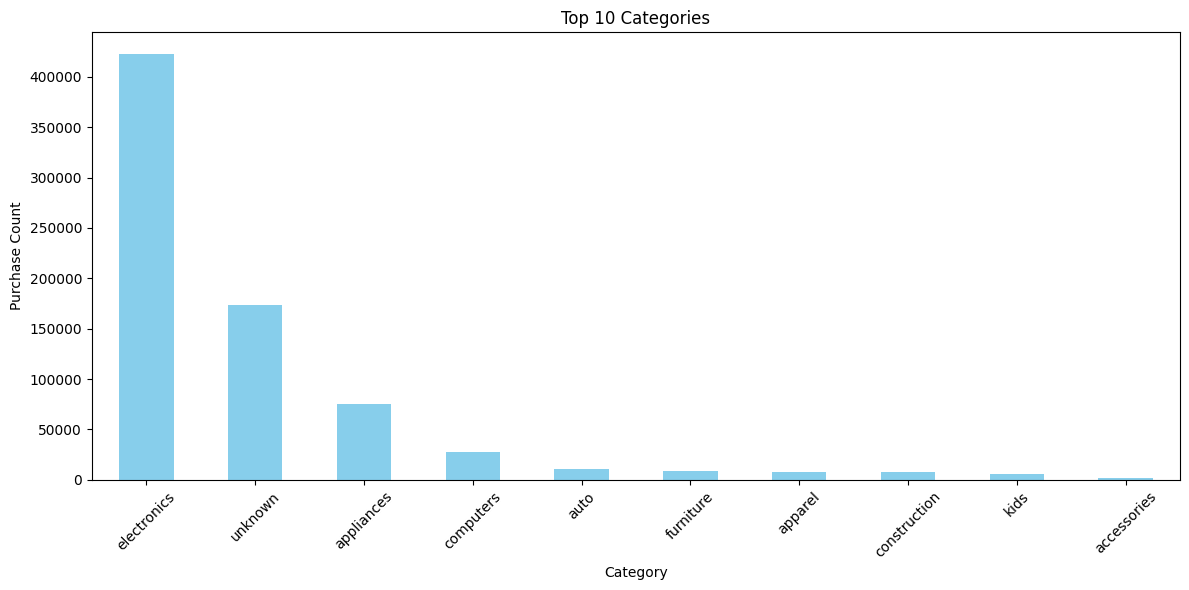

In [77]:
category_purchase = df[df['event_type'] == 'purchase'].groupby('general_category')['event_type'].count().sort_values(ascending=False)

top_categories = category_purchase.head(10)

plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Purchase Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [78]:
pd.set_option('display.float_format', '{:.2f}'.format)
display(df['price'].describe())
pd.reset_option('display.float_format')

count   42448764.00
mean         290.32
std          358.27
min            0.00
25%           65.98
50%          162.93
75%          358.57
max         2574.07
Name: price, dtype: float64

In [79]:
df['price'].max()

np.float64(2574.07)

C:\Users\User\AppData\Local\Temp\ipykernel_28328\1010297968.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cart_data['price_range'] = pd.cut(cart_data['price'], bins=bins, labels=labels, include_lowest=True)


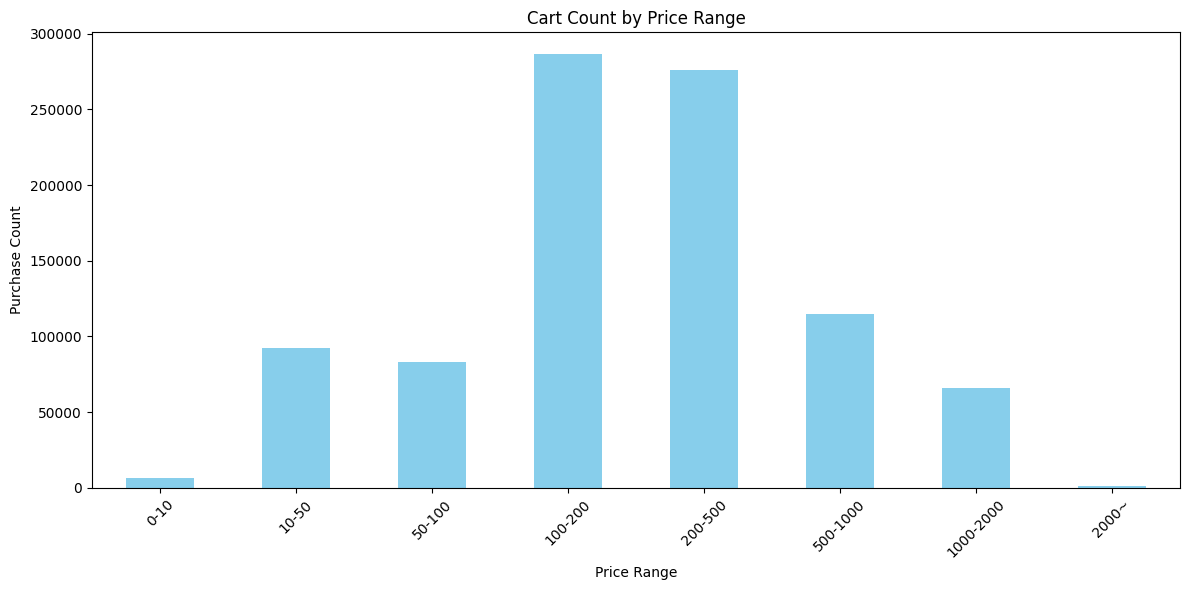

In [80]:
cart_data = df[df['event_type'] == 'cart']

bins = [0, 10, 50, 100, 200, 500, 1000, 2000, cart_data['price'].max()]
labels = ['0-10', '10-50', '50-100', '100-200', '200-500', '500-1000', '1000-2000', '2000~']
cart_data['price_range'] = pd.cut(cart_data['price'], bins=bins, labels=labels, include_lowest=True)

price_range_counts = cart_data['price_range'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
price_range_counts.plot(kind='bar', color='skyblue')
plt.title('Cart Count by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Purchase Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_28328\3546000915.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_data['price_range'] = pd.cut(purchase_data['price'], bins=bins, labels=labels, include_lowest=True)


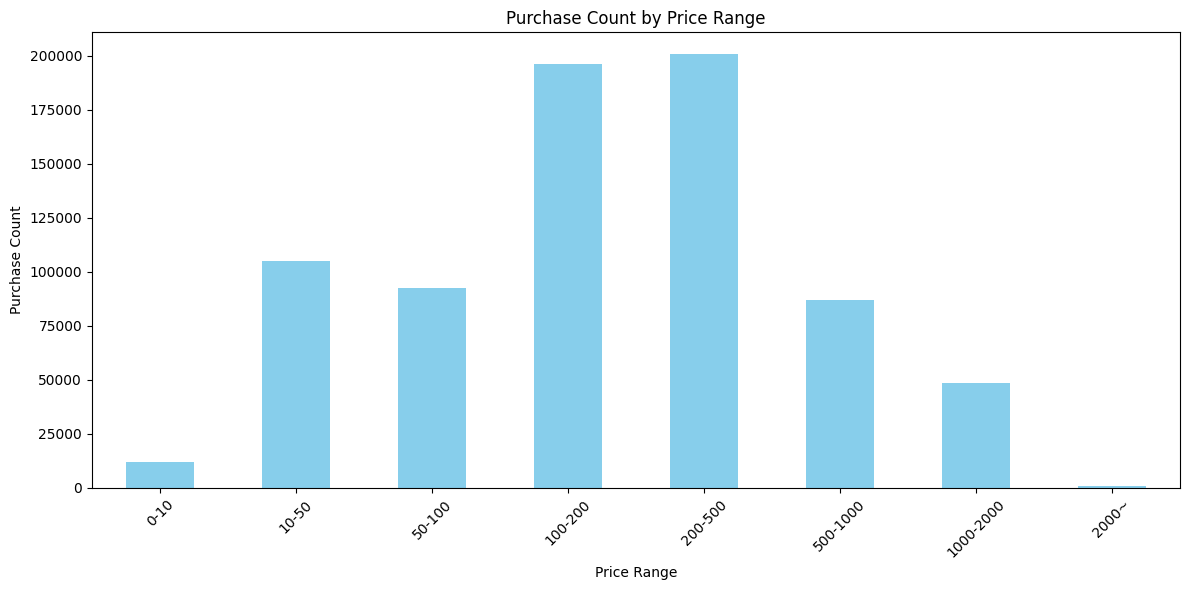

In [81]:
purchase_data = df[df['event_type'] == 'purchase']

bins = [0, 10, 50, 100, 200, 500, 1000, 2000, purchase_data['price'].max()]
labels = ['0-10', '10-50', '50-100', '100-200', '200-500', '500-1000', '1000-2000', '2000~']
purchase_data['price_range'] = pd.cut(purchase_data['price'], bins=bins, labels=labels, include_lowest=True)

price_range_counts = purchase_data['price_range'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
price_range_counts.plot(kind='bar', color='skyblue')
plt.title('Purchase Count by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Purchase Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [82]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# display(df[(df['user_id'] == 543272936) & (df['event_type'] == 'purchase')])
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df['event_time'] = pd.to_datetime(df['event_time'])

latest_date = df['event_time'].max()
rfm = df[df['event_type'] == 'purchase'].groupby('user_id').agg({
    'event_time': lambda x: (latest_date - x.max()).days,  # 최근 구매 일수
    'user_session': 'count',                              # 구매 빈도
    'price': 'sum'                                        # 구매 금액
}).reset_index()

rfm.columns = ['user_id', 'Recency', 'Frequency', 'Monetary']

# NaN 값 처리
rfm = rfm[rfm['Monetary'] > 0]


In [84]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

cluster_summary = rfm.groupby('Cluster').mean()
display(cluster_summary)


,user_id,Recency,Frequency,Monetary
Cluster,,,,
0,5.372754e+08,6.570212,2.048809,576.304204
1,5.347098e+08,21.368108,1.493965,400.346109
2,5.346941e+08,5.879708,16.905780,7232.979408
3,5.327187e+08,2.738318,75.313084,50765.943318


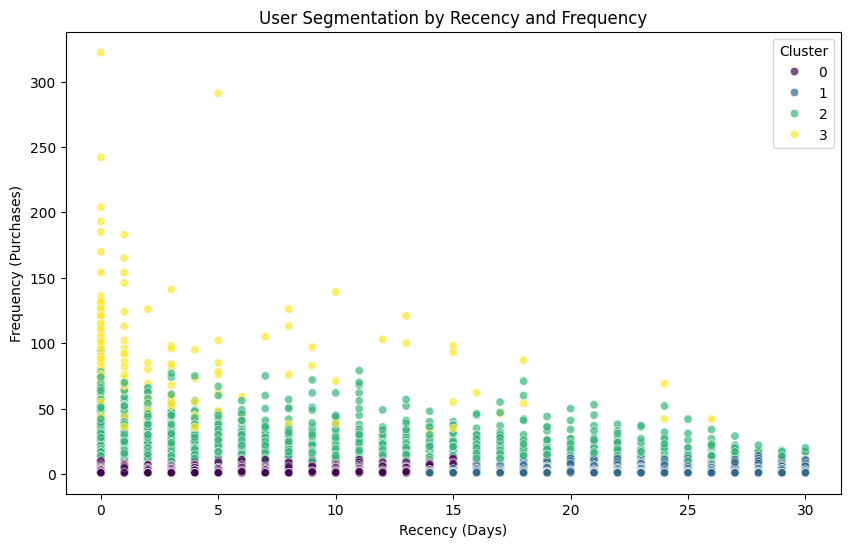

In [85]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Recency', y='Frequency', hue='Cluster', data=rfm, palette='viridis', alpha=0.7
)
plt.title('User Segmentation by Recency and Frequency')
plt.xlabel('Recency (Days)')
plt.ylabel('Frequency (Purchases)')
plt.legend(title='Cluster')
plt.show()


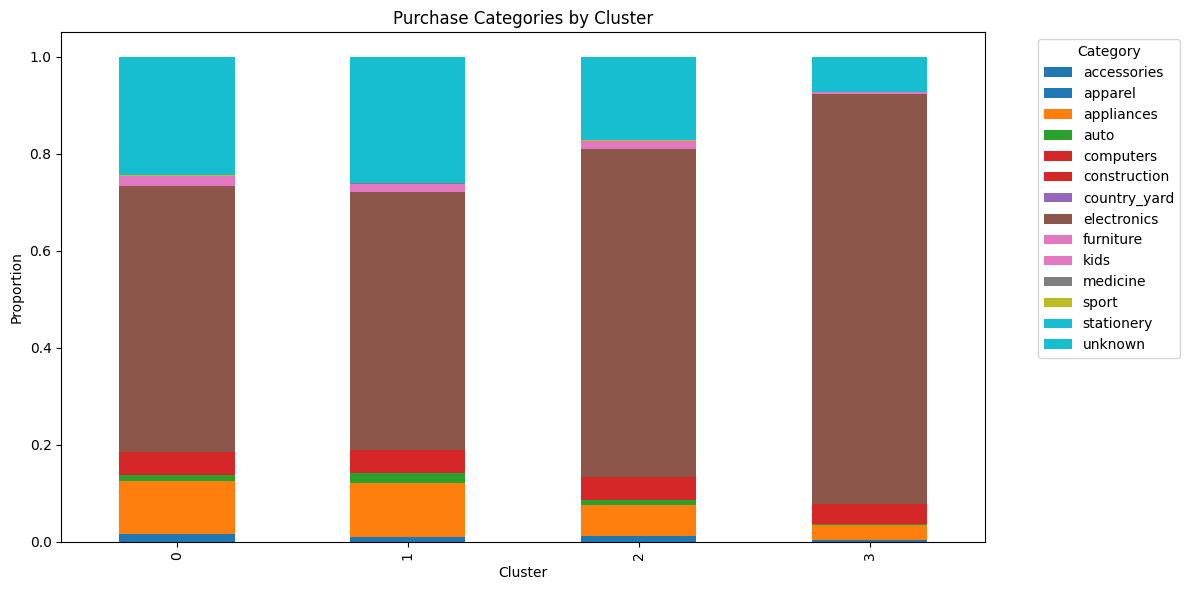

In [86]:
df_purchase = df[df['event_type'] == 'purchase'].merge(
    rfm[['user_id', 'Cluster']], on='user_id', how='left'
)

category_cluster = df_purchase.groupby(['Cluster', 'general_category']).size().unstack(fill_value=0)
category_cluster = category_cluster.div(category_cluster.sum(axis=1), axis=0)

category_cluster.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
plt.title('Purchase Categories by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [87]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])
kmeans8 = KMeans(n_clusters=8, random_state=42)
rfm['Cluster'] = kmeans8.fit_predict(rfm_scaled)

cluster_summary = rfm.groupby('Cluster').mean()
display(cluster_summary)

,user_id,Recency,Frequency,Monetary
Cluster,,,,
0,5.379085e+08,4.508119,1.613676,396.323120
1,5.343935e+08,24.737800,1.405930,375.964030
2,5.341984e+08,3.891055,35.925459,17227.256950
3,5.357531e+08,14.554787,1.507126,374.704651
4,5.340383e+08,2.980000,75.273333,48280.644000
5,5.345736e+08,5.853539,16.210391,6729.391612
6,5.240934e+08,2.153846,170.230769,158856.717692
7,5.350383e+08,7.499321,6.454269,2422.054604


Cluster 2, 4, 6: 고액 소비자
- 구매 빈도도 매우 높음. 충성도 높은 사용자들로 자주 구매하고 많은 금액을 소비하는 사용자임.

Cluster 0, 3, 5, 7: 평균적인 소비자
- 구매 빈도가 중간이거나 낮고, 소비 금액도 중간 수준임. 활동적인 사용자가 많지만 소비는 적은 경향이 있음.

Cluster 1: 활동이 적은 사용자
- 구매 빈도가 낮고, 소비 금액도 적으며, 최근 구매 시점이 오래된 사용자들이 포함된 군집임. 이 군집은 활동이 적은 사용자임.

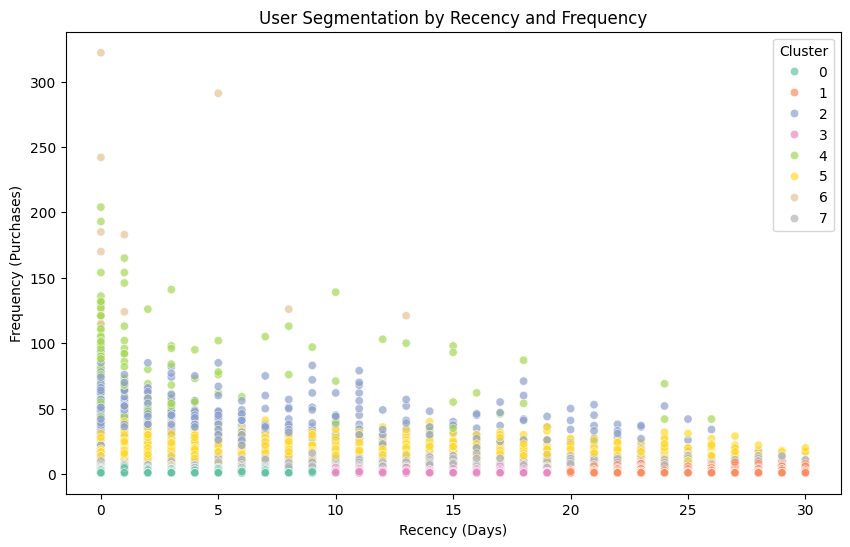

In [88]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Recency', y='Frequency', hue='Cluster', data=rfm, palette='Set2', alpha=0.7
)
plt.title('User Segmentation by Recency and Frequency')
plt.xlabel('Recency (Days)')
plt.ylabel('Frequency (Purchases)')
plt.legend(title='Cluster')
plt.show()


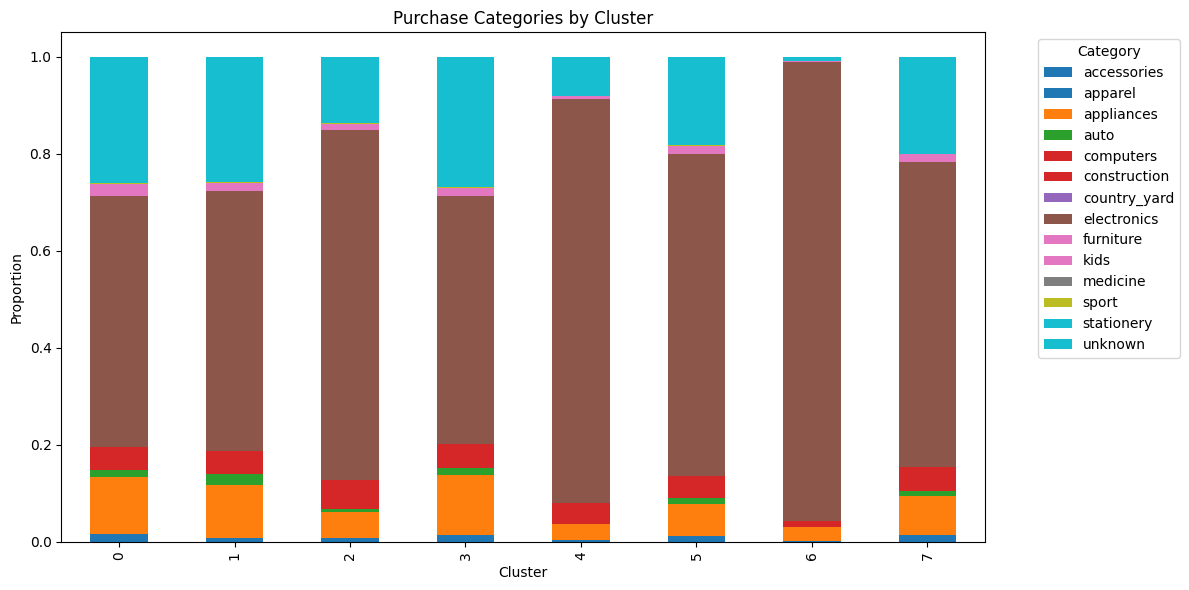

In [89]:
df_purchase = df[df['event_type'] == 'purchase'].merge(
    rfm[['user_id', 'Cluster']], on='user_id', how='left'
)

category_cluster = df_purchase.groupby(['Cluster', 'general_category']).size().unstack(fill_value=0)
category_cluster = category_cluster.div(category_cluster.sum(axis=1), axis=0)

category_cluster.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
plt.title('Purchase Categories by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [90]:
df.head()

,event_time,event_type,product_id,category_code,brand,price,user_id,user_session,weekday,general_category
0,2019-10-01 00:00:00+00:00,view,44600062,unknown.,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,Tuesday,unknown
1,2019-10-01 00:00:00+00:00,view,3900821,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,Tuesday,appliances
2,2019-10-01 00:00:01+00:00,view,17200506,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,Tuesday,furniture
3,2019-10-01 00:00:01+00:00,view,1307067,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,Tuesday,computers
4,2019-10-01 00:00:04+00:00,view,1004237,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,Tuesday,electronics


In [91]:
df.head(2)

,event_time,event_type,product_id,category_code,brand,price,user_id,user_session,weekday,general_category
0,2019-10-01 00:00:00+00:00,view,44600062,unknown.,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,Tuesday,unknown
1,2019-10-01 00:00:00+00:00,view,3900821,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,Tuesday,appliances


In [92]:
df.drop(['user_session', 'weekday'], axis=1, inplace=True)
df.head(2)

,event_time,event_type,product_id,category_code,brand,price,user_id,general_category
0,2019-10-01 00:00:00+00:00,view,44600062,unknown.,shiseido,35.79,541312140,unknown
1,2019-10-01 00:00:00+00:00,view,3900821,appliances.environment.water_heater,aqua,33.20,554748717,appliances


In [93]:
rfm.head(2)

,user_id,Recency,Frequency,Monetary,Cluster
0,264649825,25,2,1240.04,1
1,303160429,18,1,340.59,3


In [94]:
df = df.merge(rfm[['user_id', 'Cluster']], on='user_id', how='left')
df.dropna(subset=['Cluster'], inplace=True) # rfm = rfm[rfm['Monetary'] > 0]에서 걸리진 customer 제거
df.head(2)

,event_time,event_type,product_id,category_code,brand,price,user_id,general_category,Cluster
0,2019-10-01 00:00:00+00:00,view,44600062,unknown.,shiseido,35.79,541312140,unknown,1.0
5,2019-10-01 00:00:05+00:00,view,1480613,computers.desktop,pulser,908.62,512742880,computers,1.0


In [95]:
df['Cluster'].unique()

array([1., 0., 7., 5., 3., 2., 4., 6.])

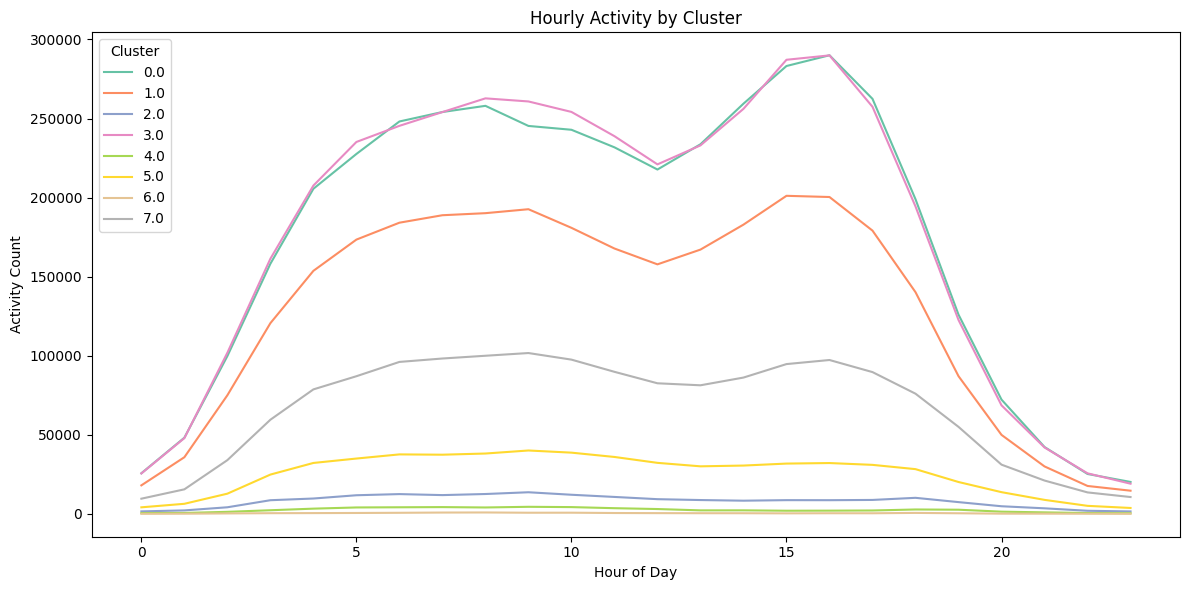

In [96]:
df['hour'] = pd.to_datetime(df['event_time']).dt.hour
hourly_activity= df.groupby(['Cluster', 'hour']).size().unstack(fill_value=0).T

hourly_activity.plot(kind='line', figsize=(12, 6), colormap='Set2')
plt.title('Hourly Activity by Cluster')
plt.xlabel('Hour of Day')
plt.ylabel('Activity Count')
plt.legend(title='Cluster', loc='upper left')
plt.tight_layout()
plt.show()

In [97]:
# product
cluster_popular_products = df[df['event_type'] == 'purchase'].groupby(['Cluster', 'product_id']).size().unstack(fill_value=0)
cluster_popular_products_top = cluster_popular_products.apply(lambda x: x.sort_values(ascending=False).head(10), axis=1)
display(cluster_popular_products_top)
# brand
cluster_popular_brands = df[df['event_type'] == 'purchase'].groupby(['Cluster', 'brand']).size().unstack(fill_value=0)
cluster_popular_brands_top = cluster_popular_brands.apply(lambda x: x.sort_values(ascending=False).head(10), axis=1)
display(cluster_popular_brands_top)

product_id,1002524,1002544,1004237,1004246,1004249,1004741,1004767,1004833,1004836,1004856,...,1005117,1005130,1005135,1005140,1005144,1201397,1801555,4804056,5100563,5100816
Cluster,,,,,,,,,,,,,,,,,,,,,
0.0,NaN,2129.0,NaN,NaN,NaN,NaN,5005.0,2812.0,1826.0,7116.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3058.0,NaN,2093.0
1.0,NaN,1531.0,NaN,NaN,NaN,1199.0,3678.0,2076.0,1277.0,5260.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2132.0,NaN,1634.0
2.0,429.0,589.0,NaN,NaN,927.0,NaN,1194.0,753.0,NaN,1060.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,565.0,NaN,NaN
3.0,NaN,1873.0,NaN,NaN,1441.0,NaN,4886.0,2713.0,1744.0,6925.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2771.0,NaN,2081.0
4.0,191.0,345.0,NaN,151.0,361.0,NaN,305.0,341.0,NaN,439.0,...,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,1088.0,1591.0,NaN,NaN,1476.0,NaN,2434.0,1439.0,NaN,2861.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1267.0,NaN,NaN
6.0,NaN,NaN,63.0,NaN,NaN,NaN,102.0,NaN,NaN,NaN,...,77.0,63.0,NaN,106.0,70.0,87.0,148.0,NaN,248.0,NaN
7.0,1655.0,2489.0,NaN,NaN,2399.0,NaN,4202.0,2514.0,NaN,5244.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2553.0,NaN,NaN


brand,acer,apple,artel,canon,cordiant,dauscher,elenberg,hp,huawei,huggies,lenovo,lg,lucente,manfrotto,oppo,samsung,sony,triangle,xiaomi
Cluster,,,,,,,,,,,,,,,,,,,
0.0,NaN,24161.0,1687.0,NaN,3297.0,NaN,1795.0,NaN,5849.0,NaN,NaN,2065.0,2472.0,NaN,3034.0,40682.0,NaN,NaN,14899.0
1.0,NaN,20489.0,1283.0,NaN,2083.0,NaN,NaN,NaN,4920.0,NaN,NaN,1500.0,1646.0,NaN,1876.0,30480.0,NaN,1610.0,11651.0
2.0,479.0,10832.0,NaN,NaN,NaN,NaN,NaN,NaN,761.0,NaN,260.0,382.0,502.0,NaN,249.0,7659.0,352.0,NaN,2290.0
3.0,NaN,23366.0,NaN,NaN,3364.0,NaN,1812.0,NaN,5530.0,NaN,NaN,2072.0,2299.0,NaN,2450.0,38815.0,NaN,1800.0,13901.0
4.0,167.0,5377.0,NaN,229.0,NaN,NaN,NaN,NaN,154.0,NaN,NaN,55.0,191.0,NaN,85.0,3153.0,103.0,NaN,458.0
5.0,960.0,22085.0,NaN,NaN,NaN,NaN,NaN,NaN,2112.0,NaN,475.0,972.0,1693.0,NaN,1099.0,18286.0,843.0,NaN,4587.0
6.0,18.0,1202.0,56.0,NaN,NaN,3.0,NaN,7.0,3.0,4.0,NaN,156.0,NaN,4.0,NaN,735.0,NaN,NaN,NaN
7.0,1400.0,35361.0,NaN,NaN,1300.0,NaN,NaN,NaN,4172.0,NaN,NaN,1525.0,2775.0,NaN,2098.0,33086.0,1446.0,NaN,8828.0


In [98]:
high_spending_clusters = [2, 4, 6]

high_spending_popular_products = cluster_popular_products_top.loc[high_spending_clusters]
high_spending_popular_brands = cluster_popular_brands_top.loc[high_spending_clusters]

display(high_spending_popular_products)
display(high_spending_popular_brands)


product_id,1002524,1002544,1004237,1004246,1004249,1004741,1004767,1004833,1004836,1004856,...,1005117,1005130,1005135,1005140,1005144,1201397,1801555,4804056,5100563,5100816
Cluster,,,,,,,,,,,,,,,,,,,,,
2.0,429.0,589.0,NaN,NaN,927.0,NaN,1194.0,753.0,NaN,1060.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,565.0,NaN,NaN
4.0,191.0,345.0,NaN,151.0,361.0,NaN,305.0,341.0,NaN,439.0,...,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.0,NaN,NaN,63.0,NaN,NaN,NaN,102.0,NaN,NaN,NaN,...,77.0,63.0,NaN,106.0,70.0,87.0,148.0,NaN,248.0,NaN


brand,acer,apple,artel,canon,cordiant,dauscher,elenberg,hp,huawei,huggies,lenovo,lg,lucente,manfrotto,oppo,samsung,sony,triangle,xiaomi
Cluster,,,,,,,,,,,,,,,,,,,
2.0,479.0,10832.0,NaN,NaN,NaN,NaN,NaN,NaN,761.0,NaN,260.0,382.0,502.0,NaN,249.0,7659.0,352.0,NaN,2290.0
4.0,167.0,5377.0,NaN,229.0,NaN,NaN,NaN,NaN,154.0,NaN,NaN,55.0,191.0,NaN,85.0,3153.0,103.0,NaN,458.0
6.0,18.0,1202.0,56.0,NaN,NaN,3.0,NaN,7.0,3.0,4.0,NaN,156.0,NaN,4.0,NaN,735.0,NaN,NaN,NaN


In [99]:
high_spending_clusters = [2, 4, 6]

high_spending_popular_products = cluster_popular_products_top.loc[high_spending_clusters]
high_spending_popular_brands = cluster_popular_brands_top.loc[high_spending_clusters]

display(high_spending_popular_products)
display(high_spending_popular_brands)

product_id,1002524,1002544,1004237,1004246,1004249,1004741,1004767,1004833,1004836,1004856,...,1005117,1005130,1005135,1005140,1005144,1201397,1801555,4804056,5100563,5100816
Cluster,,,,,,,,,,,,,,,,,,,,,
2.0,429.0,589.0,NaN,NaN,927.0,NaN,1194.0,753.0,NaN,1060.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,565.0,NaN,NaN
4.0,191.0,345.0,NaN,151.0,361.0,NaN,305.0,341.0,NaN,439.0,...,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.0,NaN,NaN,63.0,NaN,NaN,NaN,102.0,NaN,NaN,NaN,...,77.0,63.0,NaN,106.0,70.0,87.0,148.0,NaN,248.0,NaN


brand,acer,apple,artel,canon,cordiant,dauscher,elenberg,hp,huawei,huggies,lenovo,lg,lucente,manfrotto,oppo,samsung,sony,triangle,xiaomi
Cluster,,,,,,,,,,,,,,,,,,,
2.0,479.0,10832.0,NaN,NaN,NaN,NaN,NaN,NaN,761.0,NaN,260.0,382.0,502.0,NaN,249.0,7659.0,352.0,NaN,2290.0
4.0,167.0,5377.0,NaN,229.0,NaN,NaN,NaN,NaN,154.0,NaN,NaN,55.0,191.0,NaN,85.0,3153.0,103.0,NaN,458.0
6.0,18.0,1202.0,56.0,NaN,NaN,3.0,NaN,7.0,3.0,4.0,NaN,156.0,NaN,4.0,NaN,735.0,NaN,NaN,NaN


In [100]:
average_spending_clusters = [0, 3, 5, 7]

average_spending_popular_products = cluster_popular_products_top.loc[average_spending_clusters]
average_spending_popular_brands = cluster_popular_brands_top.loc[average_spending_clusters]

display(average_spending_popular_products)
display(average_spending_popular_brands)

product_id,1002524,1002544,1004237,1004246,1004249,1004741,1004767,1004833,1004836,1004856,...,1005117,1005130,1005135,1005140,1005144,1201397,1801555,4804056,5100563,5100816
Cluster,,,,,,,,,,,,,,,,,,,,,
0.0,NaN,2129.0,NaN,NaN,NaN,NaN,5005.0,2812.0,1826.0,7116.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3058.0,NaN,2093.0
3.0,NaN,1873.0,NaN,NaN,1441.0,NaN,4886.0,2713.0,1744.0,6925.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2771.0,NaN,2081.0
5.0,1088.0,1591.0,NaN,NaN,1476.0,NaN,2434.0,1439.0,NaN,2861.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1267.0,NaN,NaN
7.0,1655.0,2489.0,NaN,NaN,2399.0,NaN,4202.0,2514.0,NaN,5244.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2553.0,NaN,NaN


brand,acer,apple,artel,canon,cordiant,dauscher,elenberg,hp,huawei,huggies,lenovo,lg,lucente,manfrotto,oppo,samsung,sony,triangle,xiaomi
Cluster,,,,,,,,,,,,,,,,,,,
0.0,NaN,24161.0,1687.0,NaN,3297.0,NaN,1795.0,NaN,5849.0,NaN,NaN,2065.0,2472.0,NaN,3034.0,40682.0,NaN,NaN,14899.0
3.0,NaN,23366.0,NaN,NaN,3364.0,NaN,1812.0,NaN,5530.0,NaN,NaN,2072.0,2299.0,NaN,2450.0,38815.0,NaN,1800.0,13901.0
5.0,960.0,22085.0,NaN,NaN,NaN,NaN,NaN,NaN,2112.0,NaN,475.0,972.0,1693.0,NaN,1099.0,18286.0,843.0,NaN,4587.0
7.0,1400.0,35361.0,NaN,NaN,1300.0,NaN,NaN,NaN,4172.0,NaN,NaN,1525.0,2775.0,NaN,2098.0,33086.0,1446.0,NaN,8828.0


In [101]:
inactive_clusters = [1]

inactive_popular_products = cluster_popular_products_top.loc[inactive_clusters]
inactive_popular_brands = cluster_popular_brands_top.loc[inactive_clusters]

display(inactive_popular_products)
display(inactive_popular_brands)

product_id,1002524,1002544,1004237,1004246,1004249,1004741,1004767,1004833,1004836,1004856,...,1005117,1005130,1005135,1005140,1005144,1201397,1801555,4804056,5100563,5100816
Cluster,,,,,,,,,,,,,,,,,,,,,
1.0,NaN,1531.0,NaN,NaN,NaN,1199.0,3678.0,2076.0,1277.0,5260.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2132.0,NaN,1634.0


brand,acer,apple,artel,canon,cordiant,dauscher,elenberg,hp,huawei,huggies,lenovo,lg,lucente,manfrotto,oppo,samsung,sony,triangle,xiaomi
Cluster,,,,,,,,,,,,,,,,,,,
1.0,NaN,20489.0,1283.0,NaN,2083.0,NaN,NaN,NaN,4920.0,NaN,NaN,1500.0,1646.0,NaN,1876.0,30480.0,NaN,1610.0,11651.0


In [102]:
df.head(2)

,event_time,event_type,product_id,category_code,brand,price,user_id,general_category,Cluster,hour
0,2019-10-01 00:00:00+00:00,view,44600062,unknown.,shiseido,35.79,541312140,unknown,1.0,0
5,2019-10-01 00:00:05+00:00,view,1480613,computers.desktop,pulser,908.62,512742880,computers,1.0,0
